In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import statistics
import math


In [30]:
df = pd.read_csv("experiments.csv")

df_mysql = df[df["db"] == "mysql"]
df_sqlite = df[df["db"] == "sqlite"]

df.head()

,db,energy,time
0,sqlite,37.299377,3.020262
1,sqlite,42.392639,3.422475
2,mysql,79.951111,4.822397
3,sqlite,35.952759,3.020741
4,mysql,124.162415,5.226695


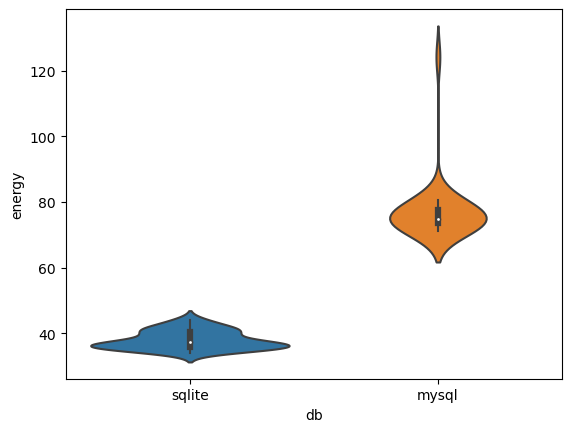

In [31]:
sns.violinplot(x="db", y="energy", data=df)
plt.show()

<Axes: xlabel='db', ylabel='energy'>

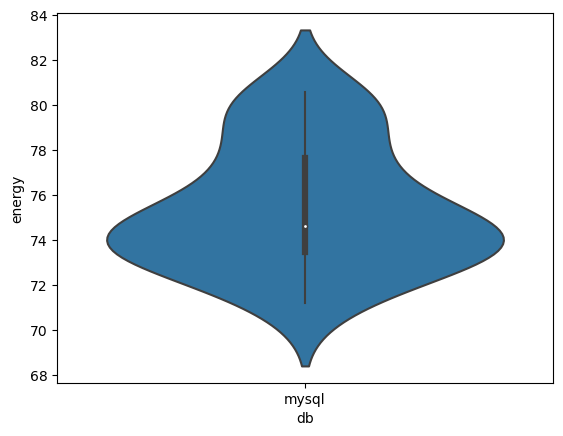

In [32]:
# z-score outlier removal
# remove all data points that deviate from the mean more than 3 standard deviations

z = np.abs((df_mysql["energy"] - df_mysql["energy"].mean()) / df_mysql["energy"].std())

df_mysql = df_mysql[z < 3]

sns.violinplot(x="db", y="energy", data=df_mysql)

<Axes: xlabel='db', ylabel='energy'>

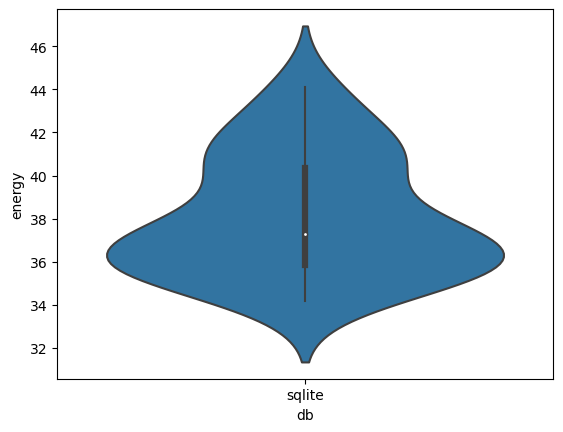

In [33]:
z = np.abs(
    (df_sqlite["energy"] - df_sqlite["energy"].mean()) / df_sqlite["energy"].std()
)

df_sqlite = df_sqlite[z < 3]

sns.violinplot(x="db", y="energy", data=df_sqlite)

In [34]:
# shapiro-wilk test

stat, p = shapiro(df_mysql["energy"])
stat, p

(0.9252632856369019, 0.04153070226311684)

In [35]:
stat, p = shapiro(df_sqlite["energy"])
stat, p

(0.915923535823822, 0.021052313968539238)

In [36]:
stat, p = mannwhitneyu(df_mysql["energy"], df_sqlite["energy"])
# p < 0.05 reject null hypothesis -> differnece is significant
stat, p

(870.0, 4.461750341666232e-11)

In [39]:
my_mean = np.mean(df_mysql["energy"])
lite_mean = np.mean(df_sqlite["energy"])

mean_diff = abs(my_mean - lite_mean)
print("Mean difference: " + str(mean_diff))

percent_change = (mean_diff / my_mean) * 100
print("Percentage change: " + str(percent_change))

st_dev_sum = statistics.stdev(df_mysql["energy"]) + statistics.stdev(df_sqlite["energy"])
cohens_d = mean_diff / (0.5 * math.sqrt(st_dev_sum))
print("Cohen's d: " + str(cohens_d))

Mean difference: 37.283578806910015
Percentage change: 49.46321041252181
Cohen's d: 31.75638868642015
